<a href="https://colab.research.google.com/github/pillaiash/CodingBot/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder



In [4]:
path = "/content/drive/MyDrive/Dataset/titanic3.xlsx"
df = pd.read_excel(path)


In [5]:
encoder = OneHotEncoder()


In [6]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [7]:
df.shape

(1309, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [9]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [10]:
df = df.drop(columns = 'cabin',axis = 1)

In [11]:
df['age'].fillna(df['age'].mean(), inplace = True)

In [12]:
print(df['embarked'].mode())

0    S
Name: embarked, dtype: object


In [13]:
print(df['embarked'].mode()[0])

S


In [14]:
df['embarked'].fillna(df['embarked'].mode()[0], inplace = True)

In [15]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            1
embarked        0
boat          823
body         1188
home.dest     564
dtype: int64

In [16]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,12.883199,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,29.881135,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [17]:
df['survived'].value_counts()

0    809
1    500
Name: survived, dtype: int64

In [19]:
sns.set

<function seaborn.rcmod.set(*args, **kwargs)>

<Axes: xlabel='survived', ylabel='count'>

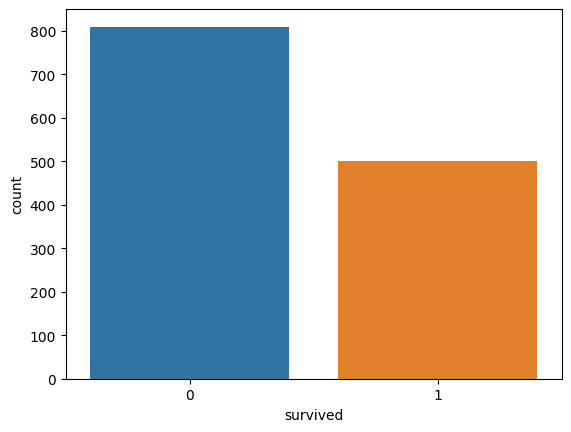

In [21]:
sns.countplot(x = 'survived', data=df)

In [23]:
df['sex'].value_counts()

male      843
female    466
Name: sex, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

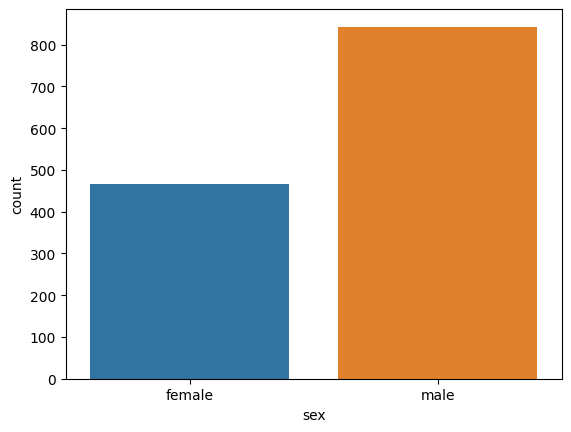

In [25]:
sns.countplot(x = 'sex', data=df)


<Axes: xlabel='sex', ylabel='count'>

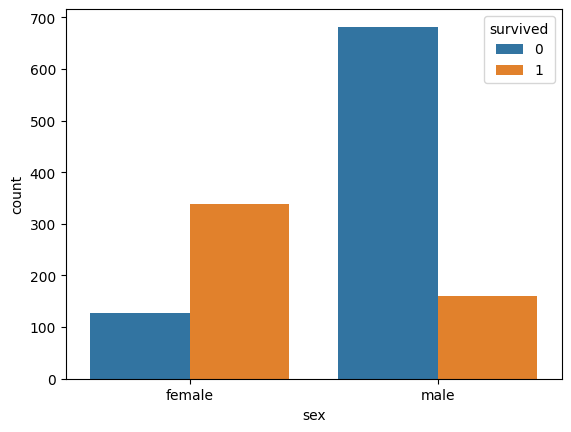

In [26]:
sns.countplot(x ='sex', hue = 'survived' , data = df)

<Axes: xlabel='pclass', ylabel='count'>

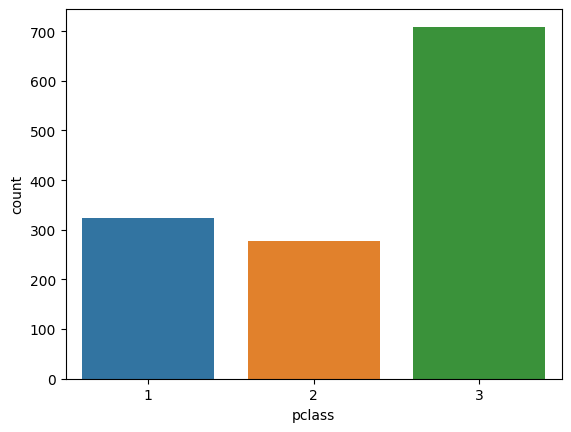

In [27]:
sns.countplot(x = 'pclass', data=df)

<Axes: xlabel='pclass', ylabel='count'>

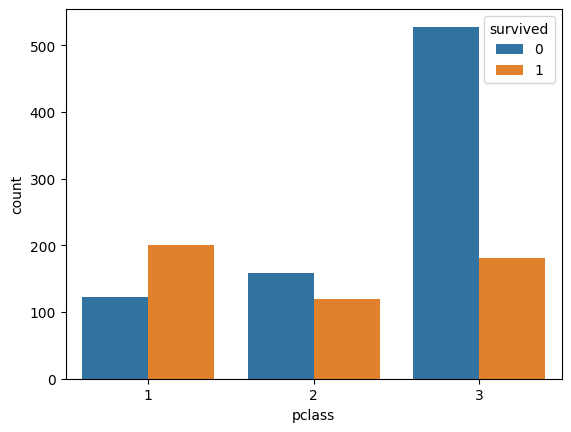

In [28]:
sns.countplot(x ='pclass', hue = 'survived' , data = df)

In [29]:
df['sex'].value_counts()

male      843
female    466
Name: sex, dtype: int64

In [30]:
df['embarked'].value_counts()

S    916
C    270
Q    123
Name: embarked, dtype: int64

In [31]:
df.replace({'sex':{'male':0  ,'female':1}, 'embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [32]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,0,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,0,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,0,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.5500,0,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,0,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [33]:
X = df.drop(columns = ['name','ticket','survived'], axis=1)
Y = df['survived']

In [34]:
print(X)

      pclass  sex        age  sibsp  parch      fare  embarked boat   body  \
0          1    1  29.000000      0      0  211.3375         0    2    NaN   
1          1    0   0.916700      1      2  151.5500         0   11    NaN   
2          1    1   2.000000      1      2  151.5500         0  NaN    NaN   
3          1    0  30.000000      1      2  151.5500         0  NaN  135.0   
4          1    1  25.000000      1      2  151.5500         0  NaN    NaN   
...      ...  ...        ...    ...    ...       ...       ...  ...    ...   
1304       3    1  14.500000      1      0   14.4542         1  NaN  328.0   
1305       3    1  29.881135      1      0   14.4542         1  NaN    NaN   
1306       3    0  26.500000      0      0    7.2250         1  NaN  304.0   
1307       3    0  27.000000      0      0    7.2250         1  NaN    NaN   
1308       3    0  29.000000      0      0    7.8750         0  NaN    NaN   

                            home.dest  
0                      

In [35]:
print(Y)

0       1
1       1
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: survived, Length: 1309, dtype: int64


In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

In [37]:
print(X.shape, X_train.shape, X_test.shape)

(1309, 10) (1047, 10) (262, 10)


In [38]:
model = LogisticRegression()


In [39]:
print(X_train.dtypes)


pclass         int64
sex            int64
age          float64
sibsp          int64
parch          int64
fare         float64
embarked       int64
boat          object
body         float64
home.dest     object
dtype: object


In [40]:
print(X_train.columns)


Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'boat',
       'body', 'home.dest'],
      dtype='object')


In [41]:
print(X_train['pclass'].unique())


[2 1 3]


In [42]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
X_train_encoded = encoder.fit_transform(X_train[['pclass']])


In [43]:
model.fit(X_train_encoded, Y_train)

LogisticRegression()

In [44]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
X_train_encoded = encoder.fit_transform(X_train[['pclass']])


In [45]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_encoded, Y_train)


LogisticRegression()

In [46]:
X_train_prediction = model.predict(X_train_encoded)


In [47]:
print(X_train_prediction)

[0 1 0 ... 0 0 0]


In [48]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data :', training_data_accuracy)

Accuracy score of training data : 0.6714422158548233
